In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sequana import ribodesigner as rd
import pysam

In [16]:
assembly = "../test/data/ribodesigner/sample.fasta"
regions_fas = "regions.fas"
genetic_type = "rRNA"
gff = "../test/data/ribodesigner/sample.gff"
filtered_gff = "annot_filtered.gff"
probes_fas = "probes.fas"
clustered_fas = "clustered.fas"
clustered_csv = "clustered.csv"

INFO    [sequana.gff3:184]:  Processing GFF file. 1. Reading the input file. Please be patient
INFO    [sequana.gff3:285]:  # kept 3 entries
INFO    [sequana.gff3:288]:  # rRNA: 3 entries
INFO    [sequana.gff3:184]:  Processing GFF file. 1. Reading the input file. Please be patient
INFO    [sequana.gff3:512]:  3 regions were extracted from '../test/data/ribodesigner/sample.fasta' to 'regions.fas'
INFO    [sequana:51]:  Found 3 'rRNA' entries in annotation file.
INFO    [sequana:52]:  Genetic types found in gff: region,rRNA
INFO    [sequana:53]:  List of 'rRNA' detected: rna-1,rna-2,rna-3
INFO    [sequana:88]:  398 probes designed.
INFO    [sequana.fasta:83]:  Reading input fasta file...please wait
INFO    [sequana.fasta:83]:  Reading input fasta file...please wait
INFO    [sequana.fasta:83]:  Reading input fasta file...please wait
INFO    [sequana.fasta:83]:  Reading input fasta file...please wait
INFO    [sequana.fasta:83]:  Reading input fasta file...please wait
INFO    [sequana.fast

0.98


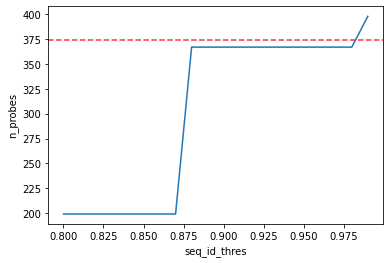

In [17]:
rd.get_rna_pos_from_gff(gff, filtered_gff, assembly,
                        regions_fas, genetic_type)

rd.get_probes(regions_fas, probes_fas, probe_len=50, inter_probe_space=15)
df = rd.cluster_probes(probes_fas, clustered_fas)
rd.fasta_to_csv(clustered_fas, clustered_csv)


## Download all bacterial genomes

In [11]:
# -r: recursive, -nd: do not keep the original hierarchy
! wget -r -nd ftp://ftp.ensemblgenomes.org/pub/current/bacteria/fasta/ .
! wget -r -nd ftp://ftp.ensemblgenomes.org/pub/current/bacteria/gff3 .


--2022-02-11 00:47:17--  ftp://ftp.ensemblgenomes.org/pub/current/bacteria/fasta/
           => ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/.listing’
Resolving ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)... 193.62.197.75
Connecting to ftp.ensemblgenomes.org (ftp.ensemblgenomes.org)|193.62.197.75|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/current/bacteria/fasta ... done.
==> PASV ... done.    ==> LIST ... done.

ftp.ensemblgenomes.     [ <=>                ]  10.21K  --.-KB/s    in 0.1s    

2022-02-11 00:47:18 (101 KB/s) - ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/.listing’ saved [10458]

Removed ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/.listing’.
--2022-02-11 00:47:18--  ftp://ftp.ensemblgenomes.org/pub/current/bacteria/fasta/bacteria_0_collection/
           => ‘ftp.ensemblgenomes.org/pub/current/bacteria/fasta/bacteria_0_collection/.listing’
==> CWD (1) /pub/cur

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

INFO:root:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/IPython/utils/_process_posix.py", line 162, in system
    res_idx = child.expect_list(patterns, self.read_timeout)
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/pexpect/spawnbase.py", line 372, in expect_list
    return exp.expect_loop(timeout)
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/pexpect/expect.py", line 161, in expect_loop
    idx = self.existing_data()
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/pexpect/expect.py", line 47, in existing_data
    before_len = spawn._before.tell()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/khourhin/programs/miniconda3/envs/dev/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.u

TypeError: object of type 'NoneType' has no len()